## 판다스 피봇(pivot)

In [4]:
df2 = pd.DataFrame({'날짜': ['01-06','01-06','01-06','01-07','01-07','01-07','01-08','01-08','01-08'],
                    '제목': ['밤편지', '아로하', 'Dynamite', '밤편지', '한숨', 'Dynamite','마리아','한숨','밤편지'],
                    '순위': [1, 2, 3, 1, 2, 3,1,2,3]})
df2

,날짜,제목,순위
0,01-06,밤편지,1
1,01-06,아로하,2
2,01-06,Dynamite,3
3,01-07,밤편지,1
4,01-07,한숨,2
5,01-07,Dynamite,3
6,01-08,마리아,1
7,01-08,한숨,2
8,01-08,밤편지,3


In [7]:
piv = df2.pivot(index='날짜', columns='제목', values='순위')

In [8]:
piv

제목,Dynamite,마리아,밤편지,아로하,한숨
날짜,,,,,
01-06,3.0,NaN,1.0,2.0,NaN
01-07,3.0,NaN,1.0,NaN,2.0
01-08,NaN,1.0,3.0,NaN,2.0


## 벅스 뮤직 탑 100

In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

url = 'https://music.bugs.co.kr/chart'

res = requests.get(url)
          
soup = BeautifulSoup(res.content, 'html.parser')


### 추출1:전체 노래(테이블)에서 각 노래(행) 리스트 추출

In [2]:
row_lst = soup.select('#CHARTrealtime > table > tbody > tr')


In [3]:
len(row_lst)

100

### 추출2-1: 각 노래(행)의 순위 리스트 추출

In [5]:
rnk = []
for row in row_lst:
    rank = row.select_one('div.ranking > strong').text
    
    rnk.append(rank)   

### 추출2-2: 각 노래(행)의 제목 리스트 추출

In [6]:
tit_lst = []
for row in row_lst:
    title = row.select_one('p.title > a').text  
    tit_lst.append(title)   

### 추출2-3: 각 노래(행)의 가수명 리스트 추출

In [7]:
art_lst = []
for row in row_lst:
    artist = row.select_one('p.artist > a').text
    
    art_lst.append(artist)   

### 데이터 프레임 만들고, 저장

In [11]:
    
bugs_df = pd.DataFrame({'순위':rnk,'제목':tit_lst,'가수':art_lst})
bugs_df = bugs_df.set_index('순위')
bugs_df.head()

bugs_df.to_csv("벅스탑100크롤링.csv",encoding='utf-8')

### 종합코드

In [ ]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=210101'

res = requests.get(url)
          
soup = BeautifulSoup(res.content, 'html.parser')

row_lst = soup.select('#CHARTday > table > tbody > tr')

rnk = []
tit_lst = []
art_lst = []

for row in row_lst:
    rank = row.select_one('div.ranking > strong').text
    title = row.select_one('p.title > a').text
    artist = row.select_one('p.artist > a').text
    
    rnk.append(rank)
    tit_lst.append(title)
    art_lst.append(artist)
        
bugs_df = pd.DataFrame({'순위':rnk,'제목':tit_lst,'가수':art_lst})
bugs_df = bugs_df.set_index('순위')
bugs_df.head()

bugs_df.to_csv("./data/벅스탑100크롤링.csv",encoding='cp949')

## 벅스 뮤직 날짜별 순위

### URL 살펴보기

### 날짜 가공하는 방법

### URL 만들기

In [13]:
searchDate = '2021-01-08'
periods = 10

basic_url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="

range_date=pd.date_range(end=searchDate, periods=periods, freq='d')

for rd in range_date:
    rd=rd.strftime('%Y%m%d')
    url=basic_url + str(rd)
    
    print(url)

https://music.bugs.co.kr/chart/track/day/total?chartdate=20201230
https://music.bugs.co.kr/chart/track/day/total?chartdate=20201231
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210101
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210102
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210103
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210104
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210105
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210106
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210107
https://music.bugs.co.kr/chart/track/day/total?chartdate=20210108


### 210108일 순위 크롤링

In [16]:
import requests
from bs4 import BeautifulSoup 

head = {'User-Agent':''}
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=210108'

res = requests.get(url,headers = head)
soup = BeautifulSoup(res.content,'html.parser')


# 하나의 row

data_lst = soup.select('#CHARTday > table > tbody > tr')

rnk_lst = []
tit_lst = []
day_lst= []
for row in row_lst:
    rnk = row.select_one('div.ranking > strong').text
    title = row.select_one('p.title > a').text
#     title = ''
#     try:
#         title = row.select_one('p.title > a').text
#     except:
#         title = row.select('p.title> span')[1].text
        
    rnk_lst.append(rnk)
    tit_lst.append(title)
    day_lst.append('21-01-08')
    
bugs_df = pd.DataFrame({'날짜': day_lst,'순위':rnk_lst,'제목':tit_lst})
bugs_df = bugs_df.set_index('날짜')
bugs_df.head()

bugs_df.to_csv("벅스탑100크롤링_날짜.csv",encoding='utf-8')

### 자동 크롤링

In [17]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm,trange


searchDate = '2021-01-08'
periods = 10



head = {'User-Agent':''}
range_date=pd.date_range(end=searchDate, periods=periods, freq='d')

rnk_lst = []
tit_lst = []
day_lst= []

for rd in range_date:
    rd=rd.strftime('%Y%m%d')
    url=basic_url + str(rd)

    res = requests.get(url,headers = head)
    soup = BeautifulSoup(res.content,'html.parser')
    
   
    # 하나의 row

    row_lst = soup.select('#CHARTday > table > tbody > tr')

    
    for row in row_lst:
        rnk = row.select_one('div.ranking > strong').text
        title = row.select_one('p.title > a').text
    #     title = ''
    #     try:
    #         title = row.select_one('p.title > a').text
    #     except:
    #         title = row.select('p.title> span')[1].text

        rnk_lst.append(rnk)
        tit_lst.append(title)
        day_lst.append(rd)

In [18]:
bugs_df = pd.DataFrame({'날짜': day_lst,'순위':rnk_lst,'제목':tit_lst})
bugs_df = bugs_df.set_index('날짜')
bugs_df['순위']=bugs_df['순위'].astype('int')


In [19]:
bugs_df

,순위,제목
날짜,,
20201230,1,우린 어쩌다 헤어진 걸까
20201230,2,For You (Feat. Crush)
20201230,3,What Do I Call You
20201230,4,"CREDIT (Feat. 염따, 기리보이, Zion.T)"
20201230,5,Dynamite
20201230,6,입김
20201230,7,VVS (Feat. JUSTHIS) (Prod. GroovyRoom)
20201230,8,서로를 위한 것
20201230,9,Life Goes On


In [21]:
music_pivot= bugs_df.pivot_table(index='날짜',columns='제목',values='순위')
music_pivot

제목,34+35,90's Love,"Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)",All I Want for Christmas Is You,Anyone,At My Worst,Bad Boy,Better,Black Mamba,Blue & Grey,...,첫사랑 (feat.SOLE(쏠)),취기를 빌려 (취향저격 그녀 X 산들),크리스마스니까,한 번에 알아본 사랑 (바른연애 길잡이 X 양요섭),한잔이면 지워질까,혼술하고 싶은 밤,홀로,휘파람,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,힘든 건 사랑이 아니다
날짜,,,,,,,,,,,,,,,,,,,,,
20201230,40.0,100.0,21.0,55.0,NaN,NaN,64.0,88.0,17.0,96.0,...,NaN,24.0,92.0,93.0,61.0,39.0,77.0,29.0,42.0,48.0
20201231,49.0,NaN,21.0,56.0,NaN,NaN,63.0,96.0,20.0,NaN,...,NaN,24.0,97.0,NaN,67.0,41.0,80.0,37.0,42.0,48.0
20210101,44.0,NaN,21.0,62.0,50.0,NaN,68.0,97.0,19.0,NaN,...,NaN,22.0,99.0,NaN,66.0,47.0,79.0,35.0,36.0,33.0
20210102,37.0,NaN,18.0,80.0,92.0,99.0,66.0,NaN,16.0,NaN,...,NaN,21.0,NaN,NaN,72.0,39.0,76.0,20.0,33.0,43.0
20210103,49.0,NaN,22.0,92.0,NaN,98.0,71.0,99.0,17.0,NaN,...,NaN,20.0,NaN,NaN,65.0,28.0,84.0,29.0,42.0,45.0
20210104,42.0,NaN,26.0,95.0,NaN,NaN,71.0,NaN,18.0,NaN,...,NaN,20.0,NaN,97.0,59.0,41.0,92.0,19.0,46.0,50.0
20210105,39.0,NaN,30.0,NaN,NaN,NaN,65.0,100.0,19.0,NaN,...,4.0,21.0,NaN,NaN,86.0,54.0,90.0,15.0,46.0,49.0
20210106,32.0,NaN,25.0,100.0,NaN,NaN,66.0,99.0,18.0,NaN,...,1.0,21.0,NaN,NaN,74.0,43.0,83.0,19.0,35.0,46.0
20210107,45.0,NaN,28.0,NaN,NaN,NaN,75.0,NaN,19.0,NaN,...,2.0,22.0,NaN,NaN,86.0,43.0,87.0,18.0,44.0,51.0


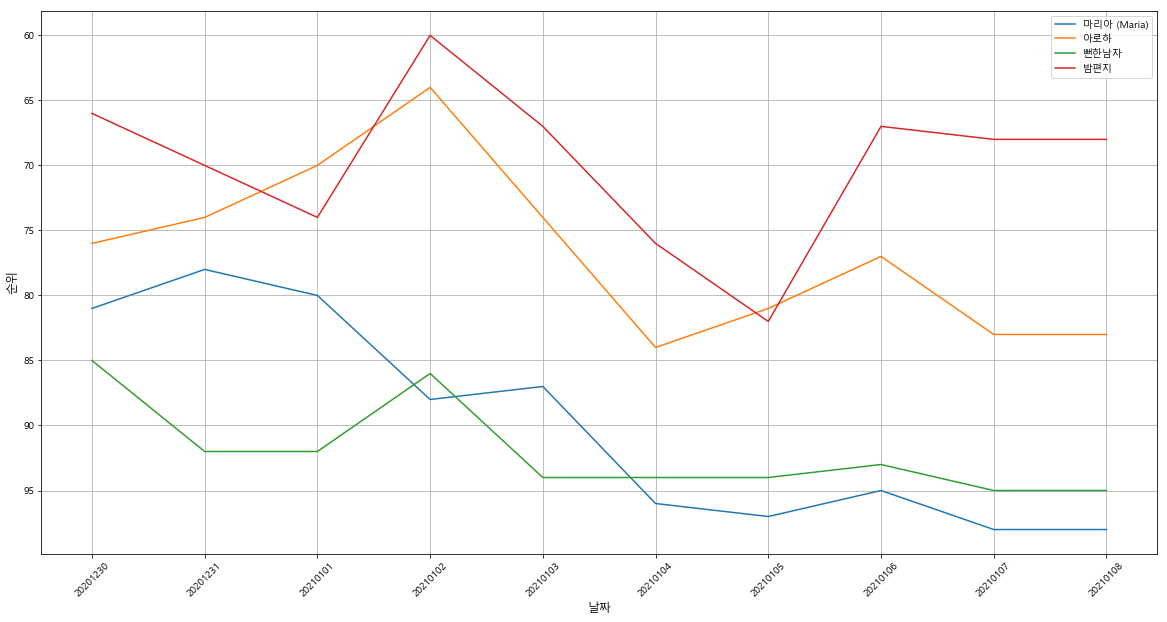

In [40]:
target_col = ['마리아 (Maria)','아로하','뻔한남자','밤편지']

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 파일 경로 지시

plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(20,10))
#plt.plot(target_col)

plt.plot(music_pivot[target_col])

plt.legend(target_col, loc='best')
plt.gca().invert_yaxis() # y축 값 뒤집기
plt.xticks(rotation=45) # x 축 텍스트 90도 돌림
plt.xlabel("날짜", fontsize=12)     # x축 정보 표시
plt.ylabel("순위", fontsize=12)     # y축 정보 표시
plt.grid()
plt.show()

## 종합 코드